First of all we load data and display a partion of it

In [1]:
import re  # Regular expressions library
import pandas as pd
from unidecode import unidecode

file_path = "/kaggle/input/ys19-2023-assignment-1/train_set.csv"
valid_path = "/kaggle/input/ys19-2023-assignment-1/valid_set.csv"
# Read the CSV file
data = pd.read_csv(file_path)
valid = pd.read_csv(valid_path)
# Display the first few rows of the data
data.head(20)

,New_ID,Text,Sentiment,Party
0,35027,#απολυμανση_κοριοι #απεντομωση_κοριος #απολυμα...,NEUTRAL,SYRIZA
1,9531,Έξι νέες επιστολές για τη Μακεδονία «καίνε» τη...,NEGATIVE,ND
2,14146,"Ισχυρό ΚΚΕ, δύναμη του λαού στη Βουλή και στου...",POSITIVE,KKE
3,28716,@five2nds @anthi7vas Μνημονιακότατο το #ΜεΡΑ25...,NEUTRAL,KKE
4,32886,@ai_katerina Αυτό που είναι συγκλονιστικό είνα...,NEUTRAL,SYRIZA
5,12112,"@tou_diaolou Εχεις δίκιο, αντι να παιζει ΕΑΜ Ε...",NEGATIVE,SYRIZA
6,13115,Προκλητικός για όλα ο Τσίπρας στον Σκάι https:...,POSITIVE,SYRIZA
7,21431,"@KSyrizohunter Τι θα πει ""αλλιώς""; Ο Μητσοτακ...",POSITIVE,ND
8,12593,Ράπισμα Αντετοκούμπο σε υποκρισία Μητσοτάκη: Π...,POSITIVE,ND
9,19725,@nikospappas16 @atsipras @kmitsotakis Δεν ξέρω...,POSITIVE,ND


First some analysis of popular letters, first find the top 5 most popular strings, and check how many times they appear at each sentiment

In [2]:
from collections import Counter

def count_word_occurrences(text, words):
    word_counts = Counter(text.split())
    return {word: word_counts[word] for word in words}

# Concatenate all text data into a single string
text_corpus = ' '.join(data['Text'].str.lower())

# Tokenize the text (split into words)
words = text_corpus.split()

# Count the frequency of each word
word_counts = Counter(words)

# Find the 5 most frequently used words
most_common_words = [word for word, _ in word_counts.most_common(20)]

# Separate the data by sentiment
positive_data = data[data['Sentiment'] == 'POSITIVE']
negative_data = data[data['Sentiment'] == 'NEGATIVE']
neutral_data = data[data['Sentiment'] == 'NEUTRAL']

# Count the occurrences of the most common words in each sentiment category
common_words_in_positive = count_word_occurrences(' '.join(positive_data['Text'].str.lower()), most_common_words)
common_words_in_negative = count_word_occurrences(' '.join(negative_data['Text'].str.lower()), most_common_words)
common_words_in_neutral = count_word_occurrences(' '.join(neutral_data['Text'].str.lower()), most_common_words)

# Print the results
for word in most_common_words:
    print(f"Word: {word}")
    print(f"Positive Occurrences: {common_words_in_positive[word]}")
    print(f"Negative Occurrences: {common_words_in_negative[word]}")
    print(f"Neutral Occurrences: {common_words_in_neutral[word]}")
    print()

Word: και
Positive Occurrences: 6347
Negative Occurrences: 6571
Neutral Occurrences: 5771

Word: το
Positive Occurrences: 6069
Negative Occurrences: 6282
Neutral Occurrences: 5690

Word: να
Positive Occurrences: 5355
Negative Occurrences: 5645
Neutral Occurrences: 4862

Word: του
Positive Occurrences: 4679
Negative Occurrences: 4797
Neutral Occurrences: 4497

Word: ο
Positive Occurrences: 4510
Negative Occurrences: 4932
Neutral Occurrences: 4497

Word: για
Positive Occurrences: 4043
Negative Occurrences: 4078
Neutral Occurrences: 3725

Word: η
Positive Occurrences: 3940
Negative Occurrences: 3675
Neutral Occurrences: 3484

Word: την
Positive Occurrences: 3618
Negative Occurrences: 3560
Neutral Occurrences: 3308

Word: με
Positive Occurrences: 3218
Negative Occurrences: 3330
Neutral Occurrences: 3010

Word: θα
Positive Occurrences: 3202
Negative Occurrences: 3201
Neutral Occurrences: 2871

Word: που
Positive Occurrences: 2884
Negative Occurrences: 3109
Neutral Occurrences: 2664

Word: δ

In the first place, with no data cleaning at all, no deduction can be made for the msot frequent words

We will also check the relationship between parties and sentiments

In [3]:
party_sentiment_counts = data.groupby(['Party', 'Sentiment']).size().unstack(fill_value=0)
party_sentiment_counts.columns = [f'{col} Count' for col in party_sentiment_counts.columns]
party_sentiment_counts.reset_index(inplace=True)
print(party_sentiment_counts)


      Party  NEGATIVE Count  NEUTRAL Count  POSITIVE Count
0      DIEM             571            642             530
1  ELL_LYSI             337            257             205
2       KKE             770           1110             989
3        ND            3438           3887            4261
4     PASOK            1682           1755            1696
5    SYRIZA            5412           4559            4529


The first thing we will do is lowercase each letter


In [4]:
data['Text'] = data['Text'].apply(lambda x: x.lower())
valid['Text'] = valid['Text'].apply(lambda x: x.lower())


Remove some common greek words (stopwords)

In [5]:
greek_stopwords = [
    'και', 'το', 'η', 'της', 'του', 'τα', 'σε', 'με', 'για', 'ειναι',
    'στο', 'απο', 'που', 'οι', 'την', 'ενα', 'μετα', 'εχει', 'δεν',
    'ειναι', 'μια', 'αυτο', 'εναν', 'αλλα', 'ο', 'μη', 'οτι', 'πως',
    'απο', 'στην', 'στον', 'τι', 'αυτη', 'των', 'αυτα', 'οταν', 'πολυ',
    'μας', 'ειναι', 'πριν', 'οτι', 'μονο', 'αυτος', 'τοτε', 'μεταξυ',
    'πολλα', 'οποτε', 'παρα', 'εαν', 'γυρω', 'αυτην', 'εκεινος', 'περισσοτερο',
    'προς', 'πολυ', 'τελικα', 'ολοι'
]
def remove_stopwords(text):
    words = text.split()  # Split the text into words
    words = [word for word in words if word.lower() not in greek_stopwords]
    return ' '.join(words)
valid['Text'] = valid['Text'].apply(remove_stopwords)
data['Text'] = data['Text'].apply(remove_stopwords)


Remove urls

In [6]:
url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
def remove_urls(text):
    return re.sub(url_pattern, '', text)
valid['Text'] = valid['Text'].apply(remove_urls)
data['Text'] = data['Text'].apply(remove_urls)

Then we also remove acute tones

In [7]:
data['Text'] = data['Text'].apply(lambda x: re.sub('ό', 'ο', x))  
data['Text'] = data['Text'].apply(lambda x: re.sub('έ', 'ε', x))  
data['Text'] = data['Text'].apply(lambda x: re.sub('ί', 'ι', x))  
data['Text'] = data['Text'].apply(lambda x: re.sub('ή', 'η', x))  
data['Text'] = data['Text'].apply(lambda x: re.sub('ύ', 'υ', x))  
data['Text'] = data['Text'].apply(lambda x: re.sub('ώ', 'ω', x))  
data['Text'] = data['Text'].apply(lambda x: re.sub('ά', 'α', x))  
data['Text'] = data['Text'].apply(lambda x: re.sub('ς', 'σ', x))  

valid['Text'] = valid['Text'].apply(lambda x: re.sub('ό', 'ο', x))  
valid['Text'] = valid['Text'].apply(lambda x: re.sub('έ', 'ε', x))  
valid['Text'] = valid['Text'].apply(lambda x: re.sub('ί', 'ι', x))  
valid['Text'] = valid['Text'].apply(lambda x: re.sub('ή', 'η', x))  
valid['Text'] = valid['Text'].apply(lambda x: re.sub('ύ', 'υ', x))  
valid['Text'] = valid['Text'].apply(lambda x: re.sub('ώ', 'ω', x))  
valid['Text'] = valid['Text'].apply(lambda x: re.sub('ά', 'α', x))  
valid['Text'] = valid['Text'].apply(lambda x: re.sub('ς', 'σ', x))  


Drop all non letters characters like # and @

In [8]:
alphabet_pattern = re.compile(r'[a-zα-ω\s]+')
def filter_alphabet(text):
    return ' '.join(alphabet_pattern.findall(text))
valid['Text'] = valid['Text'].apply(filter_alphabet)
data['Text'] = data['Text'].apply(filter_alphabet)


Remove all words that consist of 1 letter

In [9]:
word_pattern = re.compile(r'\b[a-zα-ω]{2,}\b')
def remove_single_letter_words(text):
    return ' '.join(word_pattern.findall(text))
valid['Text'] = valid['Text'].apply(remove_single_letter_words)
data['Text'] = data['Text'].apply(remove_single_letter_words)


pip install pandas nltk

In [10]:
pip install greek-stemmer-pos

  Obtaining dependency information for pytest-cov from https://files.pythonhosted.org/packages/a7/4b/8b78d126e275efa2379b1c2e09dc52cf70df16fc3b90613ef82531499d73/pytest_cov-4.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for coverage[toml]>=5.2.1 from https://files.pythonhosted.org/packages/7d/c1/46a0a53b0dfa4c389c81290e3be9e5205d45003863565aa83d264cae4463/coverage-7.3.2-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.5/227.5 kB 10.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
from greek_stemmer import stemmer

# Define a function to perform stemming on the tweets
def stem_greek_text(text):
    words = text.split()
    stemmed_words = [stemmer.stem_word(word,"NNN") for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text


# Apply the stem_greek_text function to the 'tweets' column
data['Text'] = data['Text'].apply(stem_greek_text)
valid['Text'] = valid['Text'].apply(stem_greek_text)


Save data frames as csv

The csv's we saved, will be our final data, each time we run the program we can load immediately our data without pre-processing


In [12]:
data['Text'] = data['Text'].apply(lambda x: x.lower())
valid['Text'] = valid['Text'].apply(lambda x: x.lower())
data.to_csv("data.csv", index=False)
valid.to_csv("valid.csv", index=False)
print(data.head(10))
print(valid.head(10))

   New_ID                                               Text Sentiment   Party
0   35027  απολυμανς κορι απεντομως κορι απολυμανς κορι a...   NEUTRAL  SYRIZA
1    9531  εξι νε επιστολ τ μακεδονι καιν τ νδ μητσοτακ γ...  NEGATIVE      ND
2   14146       ισχυρ κκε δυναμ λα στ βουλ στ καθημεριν αγων  POSITIVE     KKE
3   28716  five nds anthi vas μνημονιακοτατ μερ εκλογ iou...   NEUTRAL     KKE
4   32886  ai katerina αυτ εινα συγκλονιστικ εινα ψυχασθε...   NEUTRAL  SYRIZA
5   12112  tou diaolou εχ δικι αντι να παιζ εαμ ελλ μπελο...  NEGATIVE  SYRIZA
6   13115                             προκλητικ ολ τσιπρ σκα  POSITIVE  SYRIZA
7   21431  ksyrizohunter θ π αλλιως μητσοτακ δηλως εκλογ ...  POSITIVE      ND
8   12593  ραπισμ αντετοκουμπ υποκρισι μητσοτακ εξι χρονι...  POSITIVE      ND
9   19725  nikospappas atsipras kmitsotakis ξερ τους αλλ ...  POSITIVE      ND
   New_ID                                               Text Sentiment  \
0     435  glinard teza tereza adonisgeorgiadi atsipras s

After data cleaning we will check again the most frequent words

In [13]:
from collections import Counter

def count_word_occurrences(text, words):
    word_counts = Counter(text.split())
    return {word: word_counts[word] for word in words}

# Concatenate all text data into a single string
text_corpus = ' '.join(data['Text'].str.lower())

# Tokenize the text (split into words)
words = text_corpus.split()

# Count the frequency of each word
word_counts = Counter(words)

# Find the 5 most frequently used words
most_common_words = [word for word, _ in word_counts.most_common(20)]

# Separate the data by sentiment
positive_data = data[data['Sentiment'] == 'POSITIVE']
negative_data = data[data['Sentiment'] == 'NEGATIVE']
neutral_data = data[data['Sentiment'] == 'NEUTRAL']

# Count the occurrences of the most common words in each sentiment category
common_words_in_positive = count_word_occurrences(' '.join(positive_data['Text'].str.lower()), most_common_words)
common_words_in_negative = count_word_occurrences(' '.join(negative_data['Text'].str.lower()), most_common_words)
common_words_in_neutral = count_word_occurrences(' '.join(neutral_data['Text'].str.lower()), most_common_words)

# Print the results
for word in most_common_words:
    print(f"Word: {word}")
    print(f"Positive Occurrences: {common_words_in_positive[word]}")
    print(f"Negative Occurrences: {common_words_in_negative[word]}")
    print(f"Neutral Occurrences: {common_words_in_neutral[word]}")
    print()

Word: τ
Positive Occurrences: 5530
Negative Occurrences: 5830
Neutral Occurrences: 5271

Word: να
Positive Occurrences: 5455
Negative Occurrences: 5748
Neutral Occurrences: 4964

Word: τσιπρ
Positive Occurrences: 3238
Negative Occurrences: 4279
Neutral Occurrences: 3662

Word: θ
Positive Occurrences: 3399
Negative Occurrences: 3421
Neutral Occurrences: 3069

Word: μητσοτακ
Positive Occurrences: 3229
Negative Occurrences: 2808
Neutral Occurrences: 3243

Word: νδ
Positive Occurrences: 2771
Negative Occurrences: 2732
Neutral Occurrences: 2667

Word: συριζα
Positive Occurrences: 2515
Negative Occurrences: 2688
Neutral Occurrences: 2375

Word: στ
Positive Occurrences: 2579
Negative Occurrences: 2323
Neutral Occurrences: 2320

Word: εινα
Positive Occurrences: 2433
Negative Occurrences: 2330
Neutral Occurrences: 2036

Word: εκλογ
Positive Occurrences: 2250
Negative Occurrences: 2101
Neutral Occurrences: 2418

Word: απο
Positive Occurrences: 1954
Negative Occurrences: 1959
Neutral Occurrences:

We are going to use the optuna framework for hyperparameters tuning

In [14]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


tfidf and optuna

In [15]:
import optuna
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from nltk.tokenize import word_tokenize


file_path = "/kaggle/working/data.csv"
valid_path = "/kaggle/working/valid.csv"

# Read the CSV files
data = pd.read_csv(file_path)
valid = pd.read_csv(valid_path)

label_encoder = LabelEncoder()
data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])
valid['Sentiment'] = label_encoder.transform(valid['Sentiment'])

# Tokenization
valid['Tokens'] = valid['Text'].apply(word_tokenize)
data['Tokens'] = data['Text'].apply(word_tokenize)
data['Tokens'] = data['Tokens'].apply(lambda tokens: ' '.join(tokens))
valid['Tokens'] = valid['Tokens'].apply(lambda tokens: ' '.join(tokens))

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(analyzer='word')
data_tfidf = tfidf_vectorizer.fit_transform(data['Tokens'])
valid_tfidf = tfidf_vectorizer.transform(valid['Tokens'])

# Define the objective function for Optuna
def objective(trial):
    C = trial.suggest_float('C', 0.001, 0.01)
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    solver = trial.suggest_categorical('solver', ['lbfgs', 'newton-cg', 'sag', 'saga'])

    classifier = LogisticRegression(C=C, max_iter=max_iter, solver=solver, random_state=42)
    classifier.fit(data_tfidf, data['Sentiment'])
    pred_valid = classifier.predict(valid_tfidf)

    f1_macro = f1_score(valid['Sentiment'], pred_valid, average='macro')
    return f1_macro

# Create a study object and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best parameters
best_params = study.best_params

# Use the best parameters to create the final model
final_classifier = LogisticRegression(C=best_params['C'], max_iter=best_params['max_iter'], solver=best_params['solver'], random_state=42)
final_classifier.fit(data_tfidf, data['Sentiment'])
pred_valid = final_classifier.predict(valid_tfidf)

# Evaluate and print the results
accuracy = accuracy_score(valid['Sentiment'], pred_valid) * 100
f1 = f1_score(valid['Sentiment'], pred_valid, average='macro') * 100
precision = precision_score(valid['Sentiment'], pred_valid, average='macro') * 100
recall = recall_score(valid['Sentiment'], pred_valid, average='macro') * 100

print("Best Hyperparameters:", best_params)
print("Accuracy: {:.2f}".format(accuracy))
print("F1-score: {:.2f}".format(f1))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))


[I 2023-11-21 18:40:23,603] A new study created in memory with name: no-name-1f0de8b1-3d33-4703-8009-a31c3b988675
[I 2023-11-21 18:40:24,773] Trial 0 finished with value: 0.3956636834758131 and parameters: {'C': 0.0021084776405102985, 'max_iter': 627, 'solver': 'saga'}. Best is trial 0 with value: 0.3956636834758131.
[I 2023-11-21 18:40:25,889] Trial 1 finished with value: 0.394980578954176 and parameters: {'C': 0.002779103168457842, 'max_iter': 997, 'solver': 'saga'}. Best is trial 0 with value: 0.3956636834758131.
[I 2023-11-21 18:40:26,964] Trial 2 finished with value: 0.3941207031256681 and parameters: {'C': 0.0039338882897204264, 'max_iter': 500, 'solver': 'saga'}. Best is trial 0 with value: 0.3956636834758131.
[I 2023-11-21 18:40:28,019] Trial 3 finished with value: 0.39332242980420523 and parameters: {'C': 0.006037655531249419, 'max_iter': 928, 'solver': 'newton-cg'}. Best is trial 0 with value: 0.3956636834758131.
[I 2023-11-21 18:40:28,702] Trial 4 finished with value: 0.3958

Best Hyperparameters: {'C': 0.009114862826026528, 'max_iter': 264, 'solver': 'lbfgs'}
Accuracy: 40.19
F1-score: 39.64
Precision: 40.39
Recall: 40.19


doc2vec and optuna

In [16]:
import optuna
import pandas as pd
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

file_path = "/kaggle/working/data.csv"
valid_path = "/kaggle/working/valid.csv"

# Read the CSV files
data = pd.read_csv(file_path)
valid = pd.read_csv(valid_path)

label_encoder = LabelEncoder()
data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])
valid['Sentiment'] = label_encoder.transform(valid['Sentiment'])

documents_data = [TaggedDocument(words=doc.split(), tags=[str(i)]) for i, doc in enumerate(data['Text'])]
documents_valid = [TaggedDocument(words=doc.split(), tags=[str(i)]) for i, doc in enumerate(valid['Text'])]

model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=20)
model.build_vocab(documents_valid)
model.train(documents_valid, total_examples=model.corpus_count, epochs=model.epochs)

def get_vector(text):
    return model.infer_vector(text.split())
valid['Doc2Vec'] = valid['Text'].apply(get_vector)
data['Doc2Vec'] = data['Text'].apply(get_vector)

X_train, X_test = list(data['Doc2Vec']), list(valid['Doc2Vec'])
Y_train, Y_test = data['Sentiment'], valid['Sentiment']

# Define the objective function for Optuna
def objective(trial):
    C = trial.suggest_float('C', 0.001, 0.01)
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    solver = trial.suggest_categorical('solver', ['lbfgs', 'newton-cg', 'sag', 'saga'])

    classifier = LogisticRegression(C=C, max_iter=max_iter, solver=solver, random_state=42)
    classifier.fit(X_train, Y_train)
    pred_valid = classifier.predict(X_test)

    f1_macro = f1_score(Y_test, pred_valid, average='macro')
    return f1_macro

# Create a study object and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best parameters
best_params = study.best_params

# Use the best parameters to create the final model
final_classifier = LogisticRegression(C=best_params['C'], max_iter=best_params['max_iter'], solver=best_params['solver'], random_state=42)
final_classifier.fit(X_train, Y_train)
pred_valid = final_classifier.predict(X_test)

# Evaluate and print the results
accuracy = accuracy_score(Y_test, pred_valid) * 100
f1 = f1_score(Y_test, pred_valid, average='macro') * 100
precision = precision_score(Y_test, pred_valid, average='macro') * 100
recall = recall_score(Y_test, pred_valid, average='macro') * 100

print("Best Hyperparameters:", best_params)
print("Accuracy: {:.2f}".format(accuracy))
print("F1-score: {:.2f}".format(f1))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))


[I 2023-11-21 18:44:08,562] A new study created in memory with name: no-name-07edbf70-e1e2-4068-8289-346832fd17c5
[I 2023-11-21 18:44:11,094] Trial 0 finished with value: 0.373301697542104 and parameters: {'C': 0.006487937189264434, 'max_iter': 482, 'solver': 'saga'}. Best is trial 0 with value: 0.373301697542104.
[I 2023-11-21 18:44:12,326] Trial 1 finished with value: 0.37306403323210463 and parameters: {'C': 0.006156919427293868, 'max_iter': 179, 'solver': 'newton-cg'}. Best is trial 0 with value: 0.373301697542104.
[I 2023-11-21 18:44:14,901] Trial 2 finished with value: 0.3709027931442091 and parameters: {'C': 0.0022291399851569055, 'max_iter': 554, 'solver': 'saga'}. Best is trial 0 with value: 0.373301697542104.
[I 2023-11-21 18:44:16,287] Trial 3 finished with value: 0.37365809452388693 and parameters: {'C': 0.008557884114208755, 'max_iter': 917, 'solver': 'newton-cg'}. Best is trial 3 with value: 0.37365809452388693.
[I 2023-11-21 18:44:18,839] Trial 4 finished with value: 0.3

Best Hyperparameters: {'C': 0.009871591583847256, 'max_iter': 838, 'solver': 'lbfgs'}
Accuracy: 38.04
F1-score: 37.54
Precision: 38.04
Recall: 38.04


count_vectorizer and optuna

In [17]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

file_path = "/kaggle/working/data.csv"
valid_path = "/kaggle/working/valid.csv"

# Read the CSV file
data = pd.read_csv(file_path)
valid = pd.read_csv(valid_path)
label_encoder = LabelEncoder()
data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])
valid['Sentiment'] = label_encoder.transform(valid['Sentiment'])
ngram_vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 2), max_features=5000)

data_tfidf = ngram_vectorizer.fit_transform(data['Text'])
valid_tfidf = ngram_vectorizer.transform(valid['Text'])  # Use transform for validation
data_tfidf = csr_matrix(data_tfidf)
valid_tfidf = csr_matrix(valid_tfidf)

def objective(trial):
    C = trial.suggest_float('C', 0.001,1)
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    solver = trial.suggest_categorical('solver', ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga'])
    classifier = LogisticRegression(C=C, max_iter=max_iter, random_state=42,solver = solver)
    f1_macro = f1_score(valid['Sentiment'], classifier.fit(data_tfidf, data['Sentiment']).predict(valid_tfidf), average='macro')
    return f1_macro

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)


# Perform 5-fold cross-validation (you can adjust the number of folds)
best_params = study.best_params
best_classifier = LogisticRegression(C=best_params['C'], max_iter=best_params['max_iter'], random_state=42)
best_classifier.fit(data_tfidf, data['Sentiment'])
pred_valid = best_classifier.predict(valid_tfidf)

accuracy = accuracy_score(valid['Sentiment'], pred_valid)
f1 = f1_score(valid['Sentiment'], pred_valid, average='macro')
precision = precision_score(valid['Sentiment'], pred_valid, average='macro')
recall = recall_score(valid['Sentiment'], pred_valid, average='macro')

print("Best Hyperparameters:", best_params)
print("Accuracy: {:.2f}".format(accuracy * 100))
print("F1-score: {:.2f}".format(f1 * 100))
print("Precision: {:.2f}".format(precision * 100))
print("Recall: {:.2f}".format(recall * 100))

[I 2023-11-21 18:45:50,740] A new study created in memory with name: no-name-3df923ff-e1f9-4f8c-b20e-2cd40ba9572a
[I 2023-11-21 18:46:00,970] Trial 0 finished with value: 0.37766094308307135 and parameters: {'C': 0.5853006359002944, 'max_iter': 768, 'solver': 'newton-cg'}. Best is trial 0 with value: 0.37766094308307135.
[I 2023-11-21 18:46:07,704] Trial 1 finished with value: 0.3862386390638348 and parameters: {'C': 0.18014386154531456, 'max_iter': 624, 'solver': 'newton-cg'}. Best is trial 1 with value: 0.3862386390638348.
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2023-11-21 18:46:10,877] Trial 2 finished with value: 0.37748461845075054 and parameters: {'C': 0.6094661724396899, 'max_iter': 102, 'solver': 'saga'}. Best is trial 1 with value: 0.3862386390638348.
[I 2023-11-21 18:46:22,256] Trial 3 finished with value: 0.37617059809231485 and parameters

Best Hyperparameters: {'C': 0.001147454770381137, 'max_iter': 223, 'solver': 'lbfgs'}
Accuracy: 40.84
F1-score: 40.70
Precision: 41.00
Recall: 40.84


hashing vectorizer and optuna

In [18]:
import optuna
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

mavalid_path = "/kaggle/working/valid.csv"

# Read the CSV files
data = pd.read_csv(file_path)
valid = pd.read_csv(valid_path)

label_encoder = LabelEncoder()
data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])
valid['Sentiment'] = label_encoder.transform(valid['Sentiment'])

hashing_vectorizer = HashingVectorizer(n_features=100)

train = hashing_vectorizer.transform(data['Text'])
test = hashing_vectorizer.transform(valid['Text'])

# Define the objective function for Optuna
def objective(trial):
    C = trial.suggest_float('C', 0.001, 0.01)
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    solver = trial.suggest_categorical('solver', ['lbfgs', 'newton-cg', 'sag', 'saga'])

    classifier = LogisticRegression(C=C, max_iter=max_iter, solver=solver, random_state=42)
    classifier.fit(train, data['Sentiment'])
    pred_valid = classifier.predict(test)

    f1_macro = f1_score(valid['Sentiment'], pred_valid, average='macro')
    return f1_macro

# Create a study object and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best parameters
best_params = study.best_params

# Use the best parameters to create the final model
final_classifier = LogisticRegression(C=best_params['C'], max_iter=best_params['max_iter'], solver=best_params['solver'], random_state=42)
final_classifier.fit(train, data['Sentiment'])
pred_valid = final_classifier.predict(test)

# Evaluate and print the results
accuracy = accuracy_score(valid['Sentiment'], pred_valid) * 100
f1 = f1_score(valid['Sentiment'], pred_valid, average='macro') * 100
precision = precision_score(valid['Sentiment'], pred_valid, average='macro') * 100
recall = recall_score(valid['Sentiment'], pred_valid, average='macro') * 100

print("Best Hyperparameters:", best_params)
print("Accuracy: {:.2f}".format(accuracy))
print("F1-score: {:.2f}".format(f1))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))


[I 2023-11-21 18:55:29,729] A new study created in memory with name: no-name-04837586-53df-4348-8a80-5bc538e6604b
[I 2023-11-21 18:55:29,891] Trial 0 finished with value: 0.37933266150285777 and parameters: {'C': 0.005142643324013423, 'max_iter': 324, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.37933266150285777.
[I 2023-11-21 18:55:30,579] Trial 1 finished with value: 0.3793154257091033 and parameters: {'C': 0.002659930005419911, 'max_iter': 506, 'solver': 'saga'}. Best is trial 0 with value: 0.37933266150285777.
[I 2023-11-21 18:55:31,284] Trial 2 finished with value: 0.3792235732508307 and parameters: {'C': 0.007204384658214678, 'max_iter': 662, 'solver': 'saga'}. Best is trial 0 with value: 0.37933266150285777.
[I 2023-11-21 18:55:32,025] Trial 3 finished with value: 0.37801099349774114 and parameters: {'C': 0.008309134710414327, 'max_iter': 463, 'solver': 'saga'}. Best is trial 0 with value: 0.37933266150285777.
[I 2023-11-21 18:55:32,177] Trial 4 finished with value: 0.3774

Best Hyperparameters: {'C': 0.003716016660886967, 'max_iter': 536, 'solver': 'saga'}
Accuracy: 38.32
F1-score: 38.16
Precision: 38.33
Recall: 38.32


Find for each sentiment the most frequent words

In [19]:
import nltk
def get_top_words_by_sentiment(dataframe, sentiment_column, text_column, num_words=3):
    sentiment_words = {}
    for sentiment in dataframe[sentiment_column].unique():
        sentiment_texts = dataframe[dataframe[sentiment_column] == sentiment][text_column]
        sentiment_words[sentiment] = get_most_common_words(sentiment_texts, num_words)
    
    return sentiment_words

def get_most_common_words(texts, num_words):
    words = []
    
    for text in texts:
        words.extend([word.lower() for word in nltk.word_tokenize(text) if word.lower() and word.isalnum()])
    
    word_counts = Counter(words)
    top_words = word_counts.most_common(num_words)
    
    return top_words

import pandas as pd
file_path = "/kaggle/working/data.csv"
valid_path = "/kaggle/working/valid.csv"
data = pd.read_csv(file_path)
valid = pd.read_csv(valid_path)
combined_data = pd.concat([data,valid], axis=0)
top_words_by_sentiment = get_top_words_by_sentiment(combined_data, 'Sentiment', 'Text', num_words=10)

for sentiment, top_words in top_words_by_sentiment.items():
    print(f"Sentiment: {sentiment}")
    for word, count in top_words:
        print(f"{word}: {count}")

Sentiment: NEUTRAL
τ: 6062
να: 5715
τσιπρ: 4168
μητσοτακ: 3696
θ: 3545
νδ: 3033
εκλογ: 2749
συριζα: 2732
στ: 2635
εινα: 2281
Sentiment: NEGATIVE
τ: 6624
να: 6535
τσιπρ: 4932
θ: 3924
μητσοτακ: 3217
νδ: 3113
συριζα: 3046
εινα: 2702
στ: 2640
εκλογ: 2388
Sentiment: POSITIVE
τ: 6320
να: 6257
θ: 3865
μητσοτακ: 3731
τσιπρ: 3698
νδ: 3154
στ: 2919
συριζα: 2893
εινα: 2768
εκλογ: 2579


We will try to concat with the party to see if we get better results, the model we are usng for vectorization is ngrams

In [20]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score,precision_score
from scipy.sparse import csr_matrix


file_path = "/kaggle/working/data.csv"
valid_path = "/kaggle/working/valid.csv"
# Read the CSV file
data = pd.read_csv(file_path)
valid = pd.read_csv(valid_path)
label_encoder = LabelEncoder()
data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])
valid['Sentiment'] = label_encoder.transform(valid['Sentiment'])  # Use transform for validation


ngram_vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 2),max_features=5000)


data_tfidf = ngram_vectorizer.fit_transform( data['Text'] + ' ' + data['Party'])
valid_tfidf = ngram_vectorizer.transform( valid['Text'] + ' ' + valid['Party'])  # Use transform for validation
data_tfidf = csr_matrix(data_tfidf)
valid_tfidf = csr_matrix(valid_tfidf)

classifier = LogisticRegression(random_state=42,C= 0.0016049784356762025, max_iter= 724, solver = 'sag')

classifier.fit(data_tfidf, data['Sentiment'])
pred_valid = classifier.predict(valid_tfidf)

accuracy = accuracy_score(valid['Sentiment'], pred_valid)
f1 = f1_score(valid['Sentiment'], pred_valid, average='macro')
precision = precision_score(valid['Sentiment'], pred_valid, average='macro')
recall = recall_score(valid['Sentiment'], pred_valid, average='macro')

print("Best Hyperparameters:", best_params)
print("Accuracy: {:.2f}".format(accuracy * 100))
print("F1-score: {:.2f}".format(f1 * 100))
print("Precision: {:.2f}".format(precision * 100))
print("Recall: {:.2f}".format(recall * 100))

Best Hyperparameters: {'C': 0.003716016660886967, 'max_iter': 536, 'solver': 'saga'}
Accuracy: 40.65
F1-score: 40.40
Precision: 40.77
Recall: 40.65


The performance got worse, we take that back

In [21]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score,precision_score
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer


file_path = "/kaggle/working/data.csv"
valid_path = "/kaggle/working/valid.csv"
# Read the CSV file
data = pd.read_csv(file_path)
valid = pd.read_csv(valid_path)
label_encoder = LabelEncoder()
data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])
valid['Sentiment'] = label_encoder.transform(valid['Sentiment'])  # Use transform for validation


ngram_vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 2),max_features=5000)


data_tfidf = ngram_vectorizer.fit_transform(data['Text'])
valid_tfidf = ngram_vectorizer.transform(valid['Text'] )  # Use transform for validation
data_tfidf = csr_matrix(data_tfidf)
valid_tfidf = csr_matrix(valid_tfidf)


classifier = LogisticRegression(random_state=42,C= 0.0016049784356762025, max_iter= 724, solver = 'sag')
classifier.fit(data_tfidf, data['Sentiment'])
pred_valid = classifier.predict(valid_tfidf)

accuracy = accuracy_score(valid['Sentiment'], pred_valid)
f1 = f1_score(valid['Sentiment'], pred_valid, average='macro')
precision = precision_score(valid['Sentiment'], pred_valid, average='macro')
recall = recall_score(valid['Sentiment'], pred_valid, average='macro')

print("Accuracy: {:.2f}".format(accuracy * 100))
print("F1-score: {:.2f}".format(f1 * 100))
print("Precision: {:.2f}".format(precision * 100))
print("Recall: {:.2f}".format(recall * 100))

Accuracy: 40.73
F1-score: 40.61
Precision: 40.91
Recall: 40.73


Scaling data using robust scaler

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from nltk.tokenize import word_tokenize

import pandas as pd


scaler = RobustScaler(with_centering=False)
data_tfidf2 = scaler.fit_transform(data_tfidf)
valid_tfidf2 = scaler.transform(valid_tfidf)

classifier = LogisticRegression(random_state=42,C= 0.0016049784356762025, max_iter= 724, solver = 'sag')
classifier.fit(data_tfidf2, data['Sentiment'])
pred_valid = classifier.predict(valid_tfidf2)
accuracy = accuracy_score(valid['Sentiment'], pred_valid)
f1 = f1_score(valid['Sentiment'], pred_valid, average='macro')
precision = precision_score(valid['Sentiment'], pred_valid, average='macro')
recall = recall_score(valid['Sentiment'], pred_valid, average='macro')

print("Accuracy: {:.2f}".format(accuracy * 100))
print("F1-score: {:.2f}".format(f1 * 100))
print("Precision: {:.2f}".format(precision * 100))
print("Recall: {:.2f}".format(recall * 100))

Accuracy: 40.73
F1-score: 40.61
Precision: 40.91
Recall: 40.73


There is no improvement after scaling with robust, this happens perhaps because the data is sparse, seems like there is no need for scaling, however we may also try RandomProjection to reduce dimesnions

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.random_projection import SparseRandomProjection
from nltk.tokenize import word_tokenize
import pandas as pd


n_components = 100  # Specify the number of components to retain
sparse_rp = SparseRandomProjection(n_components=n_components, random_state=42)
data_tfidf2 = sparse_rp.fit_transform(data_tfidf)
valid_tfidf2 = sparse_rp.transform(valid_tfidf)

classifier = LogisticRegression(random_state=42,C= 0.0016049784356762025, max_iter= 724, solver = 'sag')
classifier.fit(data_tfidf2, data['Sentiment'])
pred_valid = classifier.predict(valid_tfidf2)

accuracy = accuracy_score(valid['Sentiment'], pred_valid)
f1 = f1_score(valid['Sentiment'], pred_valid, average='macro')
precision = precision_score(valid['Sentiment'], pred_valid, average='macro')
recall = recall_score(valid['Sentiment'], pred_valid, average='macro')

print("Best Hyperparameters:", best_params)
print("Accuracy: {:.2f}".format(accuracy * 100))
print("F1-score: {:.2f}".format(f1 * 100))
print("Precision: {:.2f}".format(precision * 100))
print("Recall: {:.2f}".format(recall * 100))

Best Hyperparameters: {'C': 0.003716016660886967, 'max_iter': 536, 'solver': 'saga'}
Accuracy: 37.81
F1-score: 37.78
Precision: 37.78
Recall: 37.81


Its getting worse, maybe check as well with Gaussian Random Projection

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.random_projection import GaussianRandomProjection
from nltk.tokenize import word_tokenize
import pandas as pd


n_components = 100  # Specify the number of components to retain
gaussian_rp = GaussianRandomProjection(n_components=n_components, random_state=42)
data_tfidf2 = gaussian_rp.fit_transform(data_tfidf)
valid_tfidf2 = gaussian_rp.transform(valid_tfidf)

classifier = LogisticRegression(random_state=42,C= 0.0016049784356762025, max_iter= 724, solver = 'sag')
classifier.fit(data_tfidf2, data['Sentiment'])
pred_valid = classifier.predict(valid_tfidf2)

accuracy = accuracy_score(valid['Sentiment'], pred_valid)
f1 = f1_score(valid['Sentiment'], pred_valid, average='macro')
precision = precision_score(valid['Sentiment'], pred_valid, average='macro')
recall = recall_score(valid['Sentiment'], pred_valid, average='macro')

print("Best Hyperparameters:", best_params)
print("Accuracy: {:.2f}".format(accuracy * 100))
print("F1-score: {:.2f}".format(f1 * 100))
print("Precision: {:.2f}".format(precision * 100))
print("Recall: {:.2f}".format(recall * 100))

Best Hyperparameters: {'C': 0.003716016660886967, 'max_iter': 536, 'solver': 'saga'}
Accuracy: 38.00
F1-score: 37.94
Precision: 38.03
Recall: 38.00


Nah not good, maybe check simple Dimension reduction

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import word_tokenize
from sklearn.decomposition import TruncatedSVD


n_components = 100  # Specify the number of components you want to retain
svd = TruncatedSVD(n_components=n_components, random_state=42)
data_tfidf2 = svd.fit_transform(data_tfidf)
valid_tfidf2 = svd.transform(valid_tfidf)

classifier = LogisticRegression(random_state=42,C= 0.0016049784356762025, max_iter= 724, solver = 'sag')
classifier.fit(data_tfidf2, data['Sentiment'])
pred_valid = classifier.predict(valid_tfidf2)

accuracy = accuracy_score(valid['Sentiment'], pred_valid)
f1 = f1_score(valid['Sentiment'], pred_valid, average='macro')
precision = precision_score(valid['Sentiment'], pred_valid, average='macro')
recall = recall_score(valid['Sentiment'], pred_valid, average='macro')

print("Best Hyperparameters:", best_params)
print("Accuracy: {:.2f}".format(accuracy * 100))
print("F1-score: {:.2f}".format(f1 * 100))
print("Precision: {:.2f}".format(precision * 100))
print("Recall: {:.2f}".format(recall * 100))

Best Hyperparameters: {'C': 0.003716016660886967, 'max_iter': 536, 'solver': 'saga'}
Accuracy: 40.06
F1-score: 39.92
Precision: 40.26
Recall: 40.06


No improvement as well, we let it as it is, with no scaling and no dimension reduction

So our final model is this

In [26]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from scipy.sparse import csr_matrix
from sklearn.model_selection import cross_val_predict



file_path = "/kaggle/working/data.csv"
valid_path = "/kaggle/working/valid.csv"
# Read the CSV file
data = pd.read_csv(file_path)
valid = pd.read_csv(valid_path)
label_encoder = LabelEncoder()
data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])
valid['Sentiment'] = label_encoder.transform(valid['Sentiment'])  # Use transform for validation
combined_data = pd.concat([data[['Text', 'Sentiment']], valid[['Text', 'Sentiment']]], ignore_index=True)

ngram_vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 2),max_features=5000)


data_tfidf = ngram_vectorizer.fit_transform(combined_data['Text'])
data_tfidf = csr_matrix(data_tfidf)


classifier = LogisticRegression(random_state=42,C= 0.0016049784356762025, max_iter= 724, solver = 'sag') 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, test_idx) in enumerate(kf.split(data_tfidf), 1):
    X_train, X_test = data_tfidf[train_idx], data_tfidf[test_idx]
    y_train, y_test = combined_data['Sentiment'].iloc[train_idx], combined_data['Sentiment'].iloc[test_idx]

    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)

    # Predict on the test data
    y_pred = classifier.predict(X_test)

    # Calculate and print scores for each fold
    accuracy = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred, average='macro') * 100
    precision = precision_score(y_test, y_pred, average='macro') * 100
    recall = recall_score(y_test, y_pred, average='macro') * 100

    print(f'Fold {fold} Accuracy: {accuracy:.2f}%')
    print(f'Fold {fold} F1 Score: {f1:.2f}%')
    print(f'Fold {fold} Precision: {precision:.2f}%')
    print(f'Fold {fold} Recall: {recall:.2f}%')
    print()

data_tfidf = ngram_vectorizer.fit_transform(data['Text'])
valid_tfidf = ngram_vectorizer.transform(valid['Text'])  # Use transform for validation
data_tfidf = csr_matrix(data_tfidf)
valid_tfidf = csr_matrix(valid_tfidf)
classifier.fit(data_tfidf, data['Sentiment'])
y_pred = classifier.predict(valid_tfidf)
accuracy = accuracy_score(valid['Sentiment'], pred_valid)
f1 = f1_score(valid['Sentiment'], pred_valid, average='macro')
precision = precision_score(valid['Sentiment'], pred_valid, average='macro')
recall = recall_score(valid['Sentiment'], pred_valid, average='macro')
print("Accuracy: {:.2f}".format(accuracy * 100))
print("F1-score: {:.2f}".format(f1 * 100))
print("Precision: {:.2f}".format(precision * 100))
print("Recall: {:.2f}".format(recall * 100))

Fold 1 Accuracy: 39.62%
Fold 1 F1 Score: 39.46%
Fold 1 Precision: 39.77%
Fold 1 Recall: 39.64%

Fold 2 Accuracy: 38.79%
Fold 2 F1 Score: 38.68%
Fold 2 Precision: 39.20%
Fold 2 Recall: 38.90%

Fold 3 Accuracy: 38.59%
Fold 3 F1 Score: 38.49%
Fold 3 Precision: 38.75%
Fold 3 Recall: 38.60%

Fold 4 Accuracy: 40.07%
Fold 4 F1 Score: 40.00%
Fold 4 Precision: 40.22%
Fold 4 Recall: 40.02%

Fold 5 Accuracy: 39.39%
Fold 5 F1 Score: 39.30%
Fold 5 Precision: 39.44%
Fold 5 Recall: 39.37%

Accuracy: 40.06
F1-score: 39.92
Precision: 40.26
Recall: 40.06


We performed a KFold for the fixed model, and the results were close to 39% as expected

The learnig curve of the model is

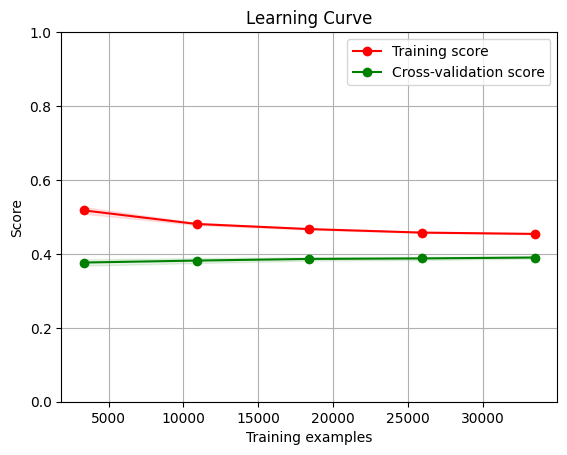

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title("Learning Curve")
    if ylim is not None:
        plt.ylim(*ylim)
    else :
        plt.ylim(0, 1)  # Set y-axis limit to (0, 1)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    
    return plt
file_path = "/kaggle/working/data.csv"
valid_path = "/kaggle/working/valid.csv"
# Read the CSV file
data = pd.read_csv(file_path)
valid = pd.read_csv(valid_path)
label_encoder = LabelEncoder()
data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])
valid['Sentiment'] = label_encoder.transform(valid['Sentiment'])  # Use transform for validation
classifier = LogisticRegression(random_state=42,C= 0.004412843928309687, max_iter = 758, solver = 'saga')
combined_data = pd.concat([data[['Text', 'Sentiment']], valid[['Text', 'Sentiment']]], ignore_index=True)
data_tfidf = ngram_vectorizer.fit_transform(combined_data['Text'])
data_tfidf = csr_matrix(data_tfidf)
classifier.fit(data_tfidf, combined_data['Sentiment'])

# Use the defined function to plot the learning curve
plot_learning_curve(classifier, data_tfidf, combined_data['Sentiment'], cv=5)
plt.show()

ROC curve

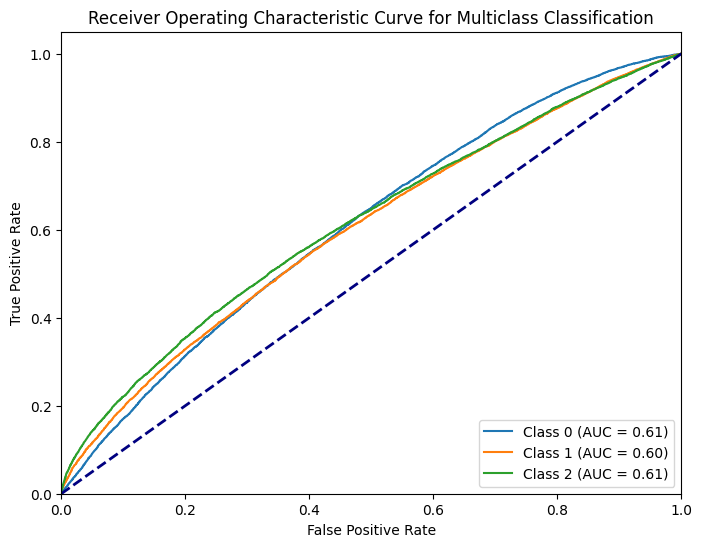

In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming you have already defined and fitted your classifier
file_path = "/kaggle/working/data.csv"
valid_path = "/kaggle/working/valid.csv"
data = pd.read_csv(file_path)
valid = pd.read_csv(valid_path)

label_encoder = LabelEncoder()
data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])
valid['Sentiment'] = label_encoder.transform(valid['Sentiment'])  

combined_data = pd.concat([data[['Text', 'Sentiment']], valid[['Text', 'Sentiment']]], ignore_index=True)

ngram_vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 2), max_features=5000)
data_tfidf = ngram_vectorizer.fit_transform(combined_data['Text'])
data_tfidf = csr_matrix(data_tfidf)

classifier = LogisticRegression(random_state=42,C= 0.0016049784356762025, max_iter= 724, solver = 'sag')
classifier.fit(data_tfidf, combined_data['Sentiment'])

# Binarize the labels
y_bin = label_binarize(combined_data['Sentiment'], classes=np.unique(combined_data['Sentiment']))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(combined_data['Sentiment']))):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], classifier.predict_proba(data_tfidf)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(combined_data['Sentiment']))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()


Confusion Matrix

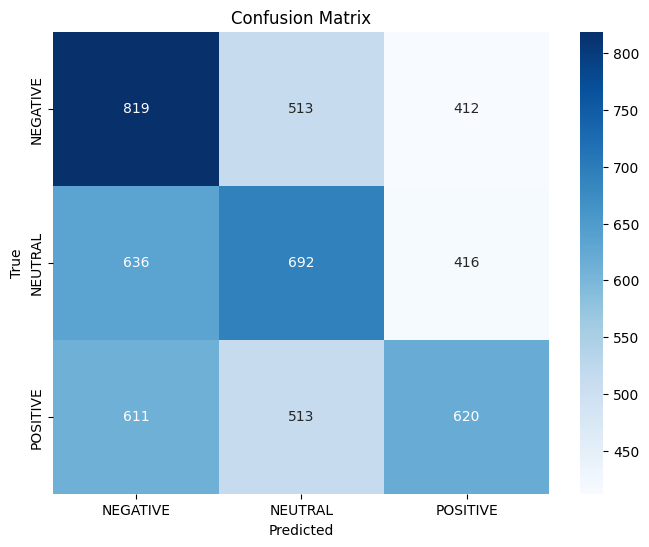

In [29]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score,precision_score
from scipy.sparse import csr_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "/kaggle/working/data.csv"
valid_path = "/kaggle/working/valid.csv"
# Read the CSV file
data = pd.read_csv(file_path)
valid = pd.read_csv(valid_path)
label_encoder = LabelEncoder()
data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])
valid['Sentiment'] = label_encoder.transform(valid['Sentiment'])  # Use transform for validation
ngram_vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 2),max_features=5000)


data_tfidf = ngram_vectorizer.fit_transform( data['Text'] )
valid_tfidf = ngram_vectorizer.transform( valid['Text'])  # Use transform for validation
data_tfidf = csr_matrix(data_tfidf)
valid_tfidf = csr_matrix(valid_tfidf)

classifier = LogisticRegression(random_state=42,C= 0.0016049784356762025, max_iter= 724, solver = 'sag')

classifier.fit(data_tfidf, data['Sentiment'])
y_pred = classifier.predict(valid_tfidf)

cm = confusion_matrix(valid['Sentiment'], y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Now we will use our model to predict the sentiments of the test set, but first we need to pre proccess the data

In [30]:
test_path = '/kaggle/input/ys19-2023-assignment-1/test_set.csv'
test = pd.read_csv(test_path)


# Load the Greek stopwords list
test['Text'] = test['Text'].apply(lambda x: x.lower())
greek_stopwords = [
    'και', 'το', 'η', 'της', 'του', 'τα', 'σε', 'με', 'για', 'ειναι',
    'στο', 'απο', 'που', 'οι', 'την', 'ενα', 'μετα', 'εχει', 'δεν',
    'ειναι', 'μια', 'αυτο', 'εναν', 'αλλα', 'ο', 'μη', 'οτι', 'πως',
    'απο', 'στην', 'στον', 'τι', 'αυτη', 'των', 'αυτα', 'οταν', 'πολυ',
    'μας', 'ειναι', 'πριν', 'οτι', 'μονο', 'αυτος', 'τοτε', 'μεταξυ',
    'πολλα', 'οποτε', 'παρα', 'εαν', 'γυρω', 'αυτην', 'εκεινος', 'περισσοτερο',
    'προς', 'πολυ', 'τελικα', 'ολοι'
]
def remove_stopwords(text):
    words = text.split()  # Split the text into words
    words = [word for word in words if word.lower() not in greek_stopwords]
    return ' '.join(words)
#test['Text'] = valid['Text'].apply(remove_stopwords)
url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
def remove_urls(text):
    if pd.isnull(text):  # Check if the text is NaN
        return text
    else:
        return re.sub(url_pattern, '', text)
test['Text'] = test['Text'].apply(remove_urls)
test['Text'] = test['Text'].apply(lambda x: re.sub('ό', 'ο', x) if isinstance(x, str) else x)
test['Text'] = test['Text'].apply(lambda x: re.sub('έ', 'ε', x)  if isinstance(x, str) else x)
test['Text'] = test['Text'].apply(lambda x: re.sub('ί', 'ι', x)  if isinstance(x, str) else x)
test['Text'] = test['Text'].apply(lambda x: re.sub('ή', 'η', x)  if isinstance(x, str) else x)
test['Text'] = test['Text'].apply(lambda x: re.sub('ύ', 'υ', x)  if isinstance(x, str) else x)
test['Text'] = test['Text'].apply(lambda x: re.sub('ώ', 'ω', x)  if isinstance(x, str) else x)
test['Text'] = test['Text'].apply(lambda x: re.sub('ά', 'α', x)  if isinstance(x, str) else x)
test['Text'] = test['Text'].apply(lambda x: re.sub('ς', 'σ', x)  if isinstance(x, str) else x)

alphabet_pattern = re.compile(r'[a-zα-ω\s]+')
def filter_alphabet(text):
    if pd.isnull(text) or not isinstance(text, str):
        return text
    else:
        return ' '.join(alphabet_pattern.findall(text))
test['Text'] = test['Text'].apply(filter_alphabet)
word_pattern = re.compile(r'\b[a-zα-ω]{2,}\b')
def remove_single_letter_words(text):
    if pd.isnull(text) or not isinstance(text, str):
        return text
    else :
        return ' '.join(word_pattern.findall(text))
test['Text'] = test['Text'].apply(remove_single_letter_words)
from greek_stemmer import stemmer




# Apply the stem_greek_text function to the 'tweets' column
test['Text'] = test['Text'].apply(stem_greek_text)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix
file_path = "/kaggle/working/data.csv"
valid_path = "/kaggle/working/valid.csv"
# Read the CSV file
data = pd.read_csv(file_path)
valid = pd.read_csv(valid_path)
label_encoder = LabelEncoder()
data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])
valid['Sentiment'] = label_encoder.transform(valid['Sentiment'])  # Use transform for validation
combined_data = pd.concat([data[['Text', 'Sentiment']], valid[['Text', 'Sentiment']]], ignore_index=True)
ngram_vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 2),max_features=5000)
data_tfidf = ngram_vectorizer.fit_transform(combined_data['Text'] )
data_tfidf = csr_matrix(data_tfidf)
classifier = LogisticRegression(random_state=42,C= 0.0016049784356762025, max_iter= 724, solver = 'sag')
classifier.fit(data_tfidf, combined_data['Sentiment'])

# Load the test data
test_tfidf = ngram_vectorizer.transform(test['Text'].fillna(''))
test_tfidf = csr_matrix(test_tfidf)
# Transform the test data using the same vectorizer


# Predict sentiment for the test set
y_pred = classifier.predict(test_tfidf)

# Map numerical predictions to labels
sentiment_mapping = {0: 'NEGATIVE', 1: 'NEUTRAL', 2: 'POSITIVE'}
y_pred_labels = [sentiment_mapping[pred] for pred in y_pred]

# Create a DataFrame with 'id' and predicted 'Sentiment'
result_df = pd.DataFrame({ 'Id' : test['New_ID'],'Predicted': y_pred_labels})
result_df


,Id,Predicted
0,1,NEUTRAL
1,2,POSITIVE
2,3,POSITIVE
3,4,NEUTRAL
4,5,POSITIVE
...,...,...
10465,10466,NEGATIVE
10466,10467,NEUTRAL
10467,10468,NEGATIVE
10468,10469,POSITIVE


In [32]:
result_df.to_csv("submission.csv", index=False)

That was it, the result is submission.csv. Thank you!